# DAMASK tutorial
- creating necessary inputs for damask
- runing the damask jobs

here more option is given to the user to select from damask python package itself.

## Importing libraries and creatign Project

In [1]:
from pyiron_continuum import Project
from damask import Rotation

In [2]:
pr = Project("damask_proj")

In [3]:
pr.remove_jobs_silently(recursive=True)

## Creating the Damask job

In [4]:
job = pr.create.job.DAMASK("damask_job")

## Creating the necessary inputs

### Homogenization

In [5]:
homogenization = pr.create.DAMASK.homogenization(method='SX', 
                                                 parameters={'N_constituents': 1,
                                                             "mechanical": {"type": "pass"}})

In [6]:
homogenization = pr.continuum.damask.Homogenization(method='SX', 
                                                     parameters={'N_constituents': 1,
                                                                 "mechanical": {"type": "pass"}})

### Elasticity

In [7]:
elasticity = pr.continuum.damask.Elasticity(type= 'Hooke', C_11= 106.75e9,
                                   C_12= 60.41e9, C_44=28.34e9)

### Plasticity

In [8]:
plasticity = pr.continuum.damask.Plasticity(N_sl=[12], a_sl=2.25, 
                                   atol_xi=1.0, dot_gamma_0_sl=0.001,
                                   h_0_sl_sl=75e6, h_sl_sl=[1, 1, 1.4, 1.4, 1.4, 1.4],
                                   n_sl=20, output=['xi_sl'], type='phenopowerlaw',
                                   xi_0_sl=[31e6], xi_inf_sl=[63e6])           

### Phase

In [9]:
phase = pr.continuum.damask.Phase(composition='Aluminum', lattice= 'cF',
                         output_list=['F', 'P', 'F_e', 'F_p', 'L_p', 'O'],
                         elasticity=elasticity, plasticity=plasticity)

### Rotation

In [10]:
rotation = pr.continuum.damask.Rotation(Rotation.from_random, 4)

### Material

In [11]:
material = pr.continuum.damask.Material([rotation],['Aluminum'], phase, homogenization)

In [12]:
job.material = material

### Grid

In [13]:
grid = pr.continuum.damask.Grid.via_voronoi_tessellation(box_size=1., grid_dim=16, num_grains=4)

In [14]:
job.grid = grid

### Loading

In [15]:
load_step =[{'mech_bc_dict':{'dot_F':[5e-3,0,0, 0,'x',0,  0,0,'x'],
                            'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 10.,'N': 40},
            'additional': {'f_out': 4}
           },{'mech_bc_dict':{'dot_F':[5e-3,0,0, 0,'x',0,  0,0,'x'],
                              'P':['x','x','x', 'x',0,'x',  'x','x',0]},
            'discretization':{'t': 60.,'N': 60},
            'additional': {'f_out': 4}
           }]

In [16]:
solver = job.list_solvers()[0]

In [17]:
job.loading = pr.continuum.damask.Loading(solver=solver, load_steps=load_step)

## Runing the job

In [18]:
job.run()

The job damask_job was saved and received the ID: 1


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [24]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,damask_job,/damask_job,/home/muhammad/,workspace/tmp/damask_tests/damask_proj/,2021-10-15 00:26:13.780089,2021-10-15 00:26:50.715075,36.0,pyiron@cmleo14#1,DAMASK,0.4,None,None


## Post-processing

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varepsilon_x$$_x$', ylabel='$\\sigma_x$$_x$(Pa)'>)

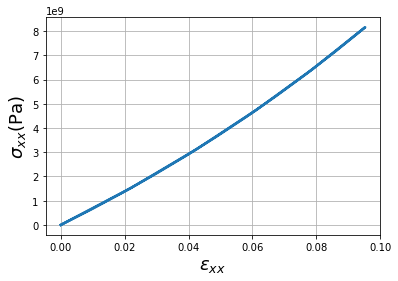

In [23]:
job.plot_stress_strain(component='xx')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$\\varepsilon_{vM}$', ylabel='$\\sigma_{vM}$ (Pa)'>)

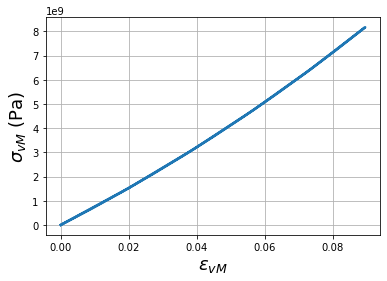

In [25]:
job.plot_stress_strain(von_mises=True)

In [26]:
job.output.damask.view(what='increment',datasets=80)


increment_80 (30.0s)
  phase
    Aluminum
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        L_p / 1/s: plastic velocity gradient
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        avg_sigma / Pa: average stress (formula: np.average(#sigma#, axis=0))
        avg_sigma_vM / Pa: average stress VM (formula: np.average(#sigma_vM#))
        avg_strain / : average strain (formula: np.average(#epsilon_V^0.0(F)#, axis=0))
        avg_strain_vM / : average strain vM (formula: np.average(#epsilon_V^0.0(F)_vM#))
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM /

In [37]:
job.output.stress

array([[[-1.83227344e-05, -1.85017066e-06,  5.70622893e-07],
        [-1.85017066e-06, -1.76968750e-05, -4.07720712e-07],
        [ 5.70622893e-07, -4.07720712e-07, -1.92359970e-05]],

       [[ 6.68250486e+08, -2.12290591e+07,  3.17746073e+06],
        [-2.12290591e+07,  4.95394276e+03,  1.30489205e+06],
        [ 3.17746073e+06,  1.30489205e+06,  4.71038656e+03]],

       [[ 1.36642747e+09, -4.28231889e+07,  6.40881159e+06],
        [-4.28231889e+07,  4.56023707e+02,  2.59743153e+06],
        [ 6.40881159e+06,  2.59743153e+06,  2.44624365e+02]],

       [[ 2.09555617e+09, -6.47894798e+07,  9.69509021e+06],
        [-6.47894798e+07, -2.96070170e+03,  3.87803954e+06],
        [ 9.69509021e+06,  3.87803954e+06, -3.24880856e+03]],

       [[ 2.85669656e+09, -8.71354972e+07,  1.30373755e+07],
        [-8.71354972e+07, -7.67468689e+03,  5.14717246e+06],
        [ 1.30373755e+07,  5.14717246e+06, -8.15260231e+03]],

       [[ 3.65095700e+09, -1.09869080e+08,  1.64367940e+07],
        [-1.09